In [1]:
import pandas
from scipy import stats
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
drive.mount('drive/')

Mounted at drive/


In [2]:
# Google Sheets CSV export link
csv_url = 'https://docs.google.com/spreadsheets/d/1sR4PpWqyrXn8fKJaLH52AhLZF2w9mitpihWO7X32Skc/export?format=csv'

# Load the dataset
df = pandas.read_csv(csv_url)

# Check the data
df


,session_id,platform,open_at,user_id,country,ab_cohort_id,segment_id,session_length,session_number_,publisher_revenue,fs_shown,rv_shown,game_count,offline_game_count,acquired_at,segment_name,ab_name,ab_cohort_name
0,e058d9e3-ea0c-4d16-a36e-3e9ed3840457,android,2020-02-09 11:27:45.717000,3675ed02-ea35-4f01-8375-2ee48b06ac5c,TN,790,783,36,5,0.000010,0,0,1,0,2020-02-08 10:35:38.630000,android_new_users,ab-test_android,gameTune
1,6b9d2f3d-fe82-45fb-9c67-9408934393b1,android,2020-02-09 11:04:38.491000,3675ed02-ea35-4f01-8375-2ee48b06ac5c,TN,790,783,158,4,0.000110,1,0,1,0,2020-02-08 10:35:38.630000,android_new_users,ab-test_android,gameTune
2,bdf0bb00-9241-4e2a-969b-c55267befa76,android,2020-02-09 10:59:48.496000,3675ed02-ea35-4f01-8375-2ee48b06ac5c,TN,790,783,90,3,0.000020,1,0,0,0,2020-02-08 10:35:38.630000,android_new_users,ab-test_android,gameTune
3,79ea0b6c-ea19-480d-b6b4-60acbef70241,android,2020-02-05 12:15:02.907000,51ea5d8d-9b28-4111-ab23-40961dc43321,AE,789,783,517,1,0.055515,7,0,4,0,2020-02-05 12:15:02.907000,android_new_users,ab-test_android,xxHigh
4,f5f1f67f-ac44-45ba-9650-07b8081d897f,android,2020-02-07 06:03:13.014000,ecfbf8db-300f-4ceb-a533-47d9bf0c9fc7,AE,790,783,385,1,0.014300,2,0,5,0,2020-02-07 06:03:13.014000,android_new_users,ab-test_android,gameTune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372829,8be26aa7-be0c-45c4-b55e-935f5d35cec4,ios,2020-02-17 07:52:06.131000,af301d08-dd5a-42c5-b9e8-b9115073ec2d,US,796,792,91,1,0.034047,1,0,2,0,2020-02-17 07:52:06.131000,ios_new_users,ab-test_ios,control
372830,f43b7940-7b04-43d2-97e7-e84679303bcf,ios,2020-02-17 04:38:01.166000,74b69fd3-5fbb-4de2-9e1d-edda05bf70de,US,799,792,452,1,0.104641,5,0,4,0,2020-02-17 04:38:01.166000,ios_new_users,ab-test_ios,gameTune
372831,cd5b92af-a4ec-4a63-ba15-018c461f194d,ios,2020-02-17 05:37:26.929000,b7c1d4da-6803-4f22-b7d7-3170f8f0ecd3,US,797,792,134,3,0.023911,1,0,1,0,2020-02-17 00:51:04.120000,ios_new_users,ab-test_ios,xHigh
372832,e094a2e7-598d-4686-b445-3f9196ff7936,ios,2020-02-17 02:25:25.366000,b7c1d4da-6803-4f22-b7d7-3170f8f0ecd3,US,797,792,271,2,0.104209,5,0,3,0,2020-02-17 00:51:04.120000,ios_new_users,ab-test_ios,xHigh


In [56]:
df_demo = df_demo[(df_demo["session_length"]>10) & (df_demo["session_length"]<10_000)]

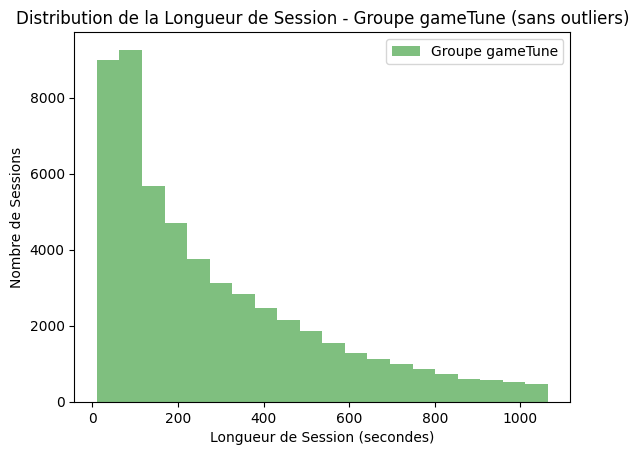

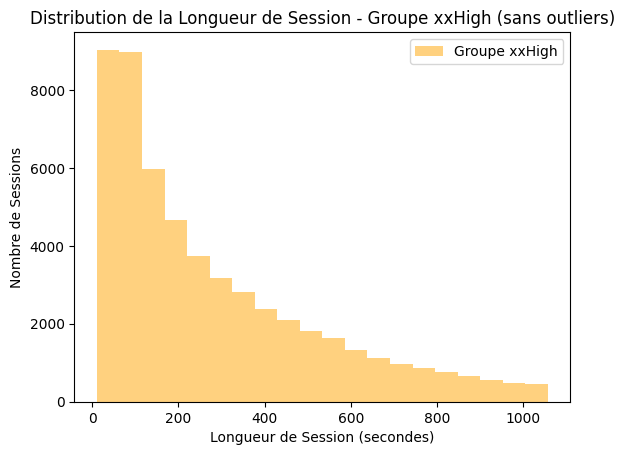

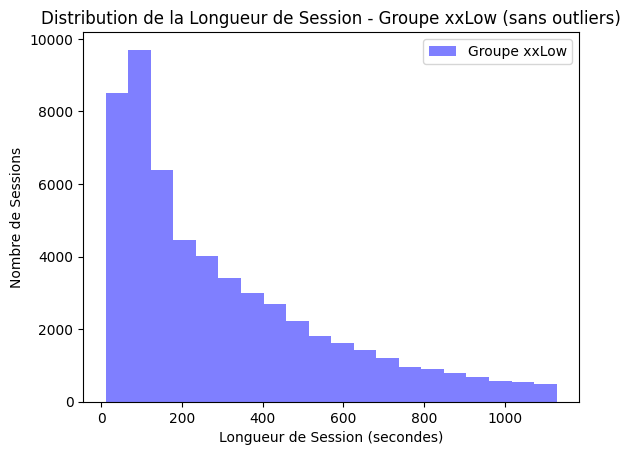

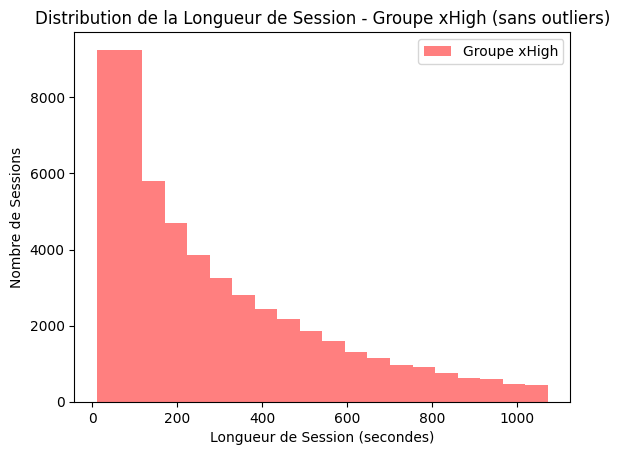

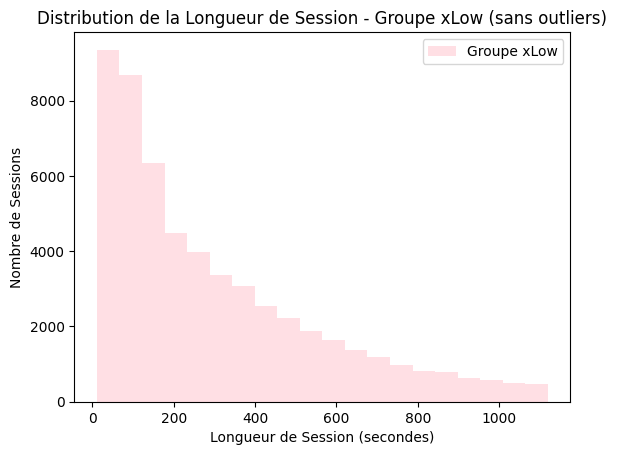

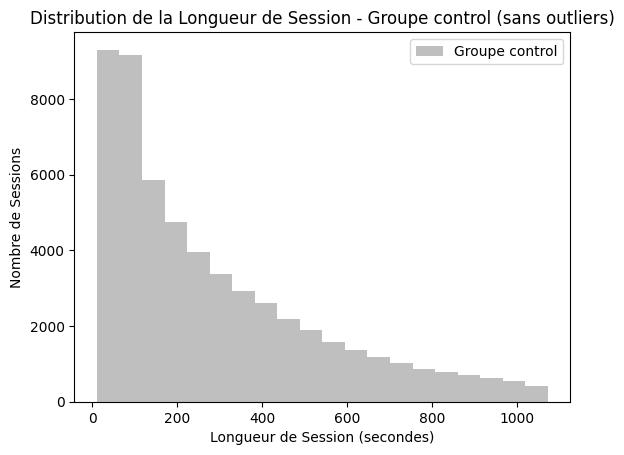

In [59]:
import matplotlib.pyplot as plt

# Calculer les bornes de l'IQR pour chaque groupe et supprimer les outliers
def remove_outliers(df_demo, column):
    Q1 = df_demo[column].quantile(0.25)  # Premier quartile
    Q3 = df_demo[column].quantile(0.75)  # Troisième quartile
    IQR = Q3 - Q1  # Intervalle interquartile

    # Définir les limites pour détecter les outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Retourner le DataFrame sans les outliers
    return df_demo[(df_demo[column] >= lower_bound) & (df_demo[column] <= upper_bound)]

# Créer une liste des fréquences de l'AB Test
frequencies = df_demo['ab_cohort_name'].unique()

# Créer des histogrammes pour chaque fréquence sur des graphiques séparés
for freq in frequencies:
    # Filtrer les données pour chaque groupe en fonction de la fréquence et enlever les outliers
    df_filtered = df_demo[df_demo['ab_cohort_name'] == freq]
    df_filtered_no_outliers = remove_outliers(df_filtered, 'session_length')



    # Créer un histogramme pour chaque groupe avec des couleurs spécifiques
    if freq == 'xxLow':
        color = 'blue'
    elif freq == 'xxHigh':
        color = 'orange'
    elif freq == 'gameTune':
        color = 'green'
    elif freq == 'xLow':
        color = 'pink'
    elif freq == 'xHigh':
        color = 'red'
    else:
        color = 'gray'

    plt.hist(df_filtered_no_outliers['session_length'],
             bins=20,
             alpha=0.5,
             label=f'Groupe {freq}',
             color=color)

    # Ajouter des éléments au graphique
    plt.title(f'Distribution de la Longueur de Session - Groupe {freq} (sans outliers)')
    plt.xlabel('Longueur de Session (secondes)')
    plt.ylabel('Nombre de Sessions')
    plt.legend()

    # Afficher le graphique
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Calculer les bornes de l'IQR pour chaque groupe et supprimer les outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # Premier quartile
    Q3 = df[column].quantile(0.75)  # Troisième quartile
    IQR = Q3 - Q1  # Intervalle interquartile

    # Définir les limites pour détecter les outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Retourner le DataFrame sans les outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Créer une liste des fréquences de l'AB Test
frequencies = df['ab_cohort_name'].unique()

# Créer des histogrammes pour chaque fréquence sur des graphiques séparés
for freq in frequencies:
    # Filtrer les données pour chaque groupe en fonction de la fréquence et enlever les outliers
    df_filtered = df[df['ab_cohort_name'] == freq]
    df_filtered_no_outliers = remove_outliers(df_filtered, 'session_length')



    # Créer un histogramme pour chaque groupe avec des couleurs spécifiques
    if freq == 'xxLow':
        color = 'blue'
    elif freq == 'xxHigh':
        color = 'orange'
    elif freq == 'gameTune':
        color = 'green'
    elif freq == 'xLow':
        color = 'pink'
    elif freq == 'xHigh':
        color = 'red'
    else:
        color = 'gray'

    plt.hist(df_filtered_no_outliers['session_length'],
             bins=20,
             alpha=0.5,
             label=f'Groupe {freq}',
             color=color)

    # Ajouter des éléments au graphique
    plt.title(f'Distribution de la Longueur de Session - Groupe {freq} (sans outliers)')
    plt.xlabel('Longueur de Session (secondes)')
    plt.ylabel('Nombre de Sessions')
    plt.legend()

    # Afficher le graphique
    plt.show()

In [ ]:
#Box plot avant le nettoyage de données(contient toujours des valeurs aberrantes)

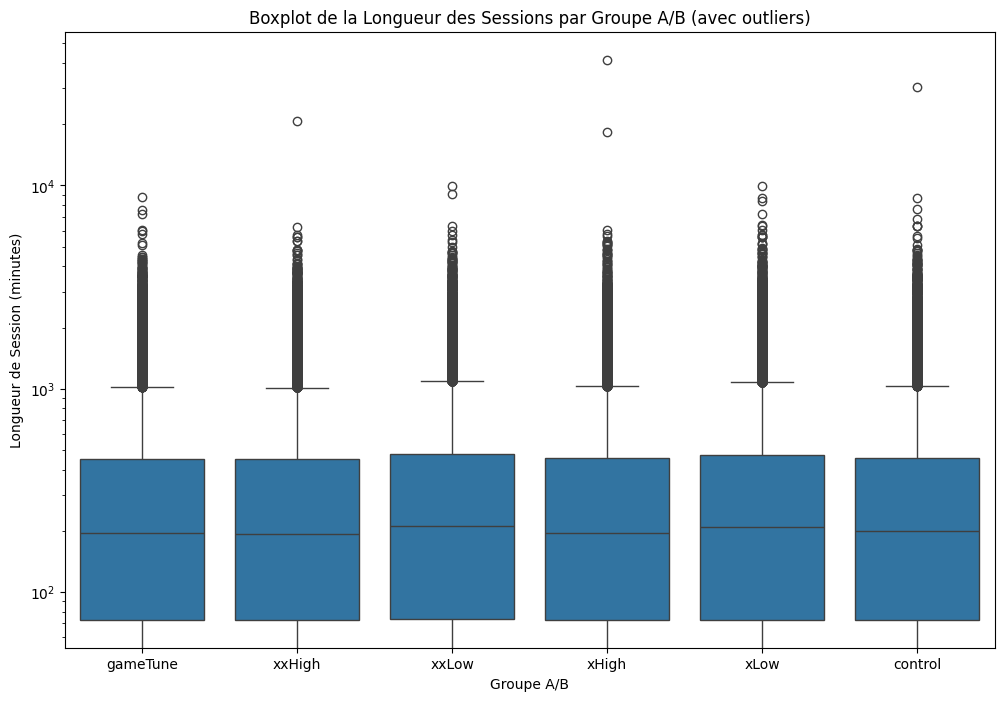

In [37]:
# Avec valeurs aberrants
plt.figure(figsize=(12, 8))
sns.boxplot(x='ab_cohort_name', y='session_length', data=df)

# Ajouter des titres et labels
plt.title('Boxplot de la Longueur des Sessions par Groupe A/B (avec outliers)')
plt.xlabel('Groupe A/B')
plt.ylabel('Longueur de Session (minutes)')
plt.yscale('log')
# Afficher le graphique
plt.show()

<ipython-input-48-9f729da59c0f>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_demo = df.groupby('ab_cohort_name').apply(lambda x: remove_outliers(x, 'session_length')).reset_index(drop=True)


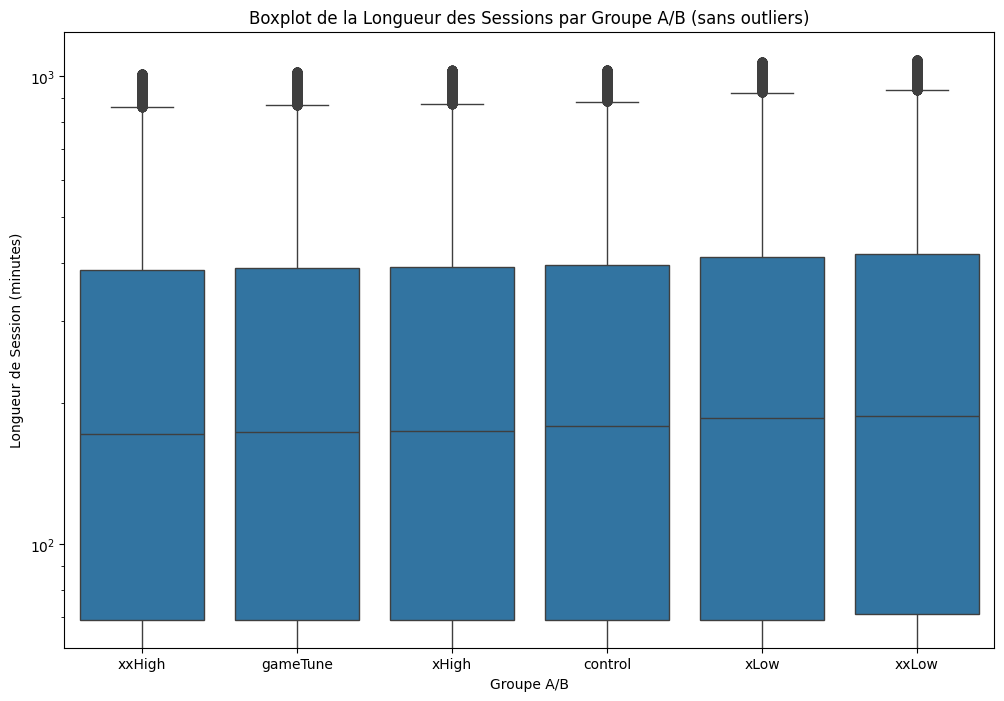

In [48]:
# Box plot avec valeurs
# Appliquer la fonction de suppression des outliers pour chaque groupe
df_demo = df.groupby('ab_cohort_name').apply(lambda x: remove_outliers(x, 'session_length')).reset_index(drop=True)

# Calculer la médiane de chaque groupe pour classer les fréquences
median_order = df_demo.groupby('ab_cohort_name')['session_length'].median().sort_values().index

# Créer le boxplot avec les groupes en ordre croissant de la médiane
plt.figure(figsize=(12, 8))
sns.boxplot(x='ab_cohort_name', y='session_length', data=df_demo, order=median_order)

# Ajouter des titres et labels
plt.title('Boxplot de la Longueur des Sessions par Groupe A/B (sans outliers)')
plt.xlabel('Groupe A/B')
plt.ylabel('Longueur de Session (minutes)')

# Utiliser une échelle logarithmique pour mieux visualiser les données
plt.yscale('log')

# Afficher le graphique
plt.show()

In [63]:
# Nombre de valeurs aberrants retirer
len(df) - len(df_demo)

25465

In [29]:
# Retirer les doubles
df = df.drop_duplicates()


print(f"Nombre de lignes après suppression des doublons : {len(df)}")
df

Nombre de lignes après suppression des doublons : 372834


,session_id,platform,open_at,user_id,country,ab_cohort_id,segment_id,session_length,session_number_,publisher_revenue,fs_shown,rv_shown,game_count,offline_game_count,acquired_at,segment_name,ab_name,ab_cohort_name
0,e058d9e3-ea0c-4d16-a36e-3e9ed3840457,android,2020-02-09 11:27:45.717000,3675ed02-ea35-4f01-8375-2ee48b06ac5c,TN,790,783,36,5,0.000010,0,0,1,0,2020-02-08 10:35:38.630000,android_new_users,ab-test_android,gameTune
1,6b9d2f3d-fe82-45fb-9c67-9408934393b1,android,2020-02-09 11:04:38.491000,3675ed02-ea35-4f01-8375-2ee48b06ac5c,TN,790,783,158,4,0.000110,1,0,1,0,2020-02-08 10:35:38.630000,android_new_users,ab-test_android,gameTune
2,bdf0bb00-9241-4e2a-969b-c55267befa76,android,2020-02-09 10:59:48.496000,3675ed02-ea35-4f01-8375-2ee48b06ac5c,TN,790,783,90,3,0.000020,1,0,0,0,2020-02-08 10:35:38.630000,android_new_users,ab-test_android,gameTune
3,79ea0b6c-ea19-480d-b6b4-60acbef70241,android,2020-02-05 12:15:02.907000,51ea5d8d-9b28-4111-ab23-40961dc43321,AE,789,783,517,1,0.055515,7,0,4,0,2020-02-05 12:15:02.907000,android_new_users,ab-test_android,xxHigh
4,f5f1f67f-ac44-45ba-9650-07b8081d897f,android,2020-02-07 06:03:13.014000,ecfbf8db-300f-4ceb-a533-47d9bf0c9fc7,AE,790,783,385,1,0.014300,2,0,5,0,2020-02-07 06:03:13.014000,android_new_users,ab-test_android,gameTune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372829,8be26aa7-be0c-45c4-b55e-935f5d35cec4,ios,2020-02-17 07:52:06.131000,af301d08-dd5a-42c5-b9e8-b9115073ec2d,US,796,792,91,1,0.034047,1,0,2,0,2020-02-17 07:52:06.131000,ios_new_users,ab-test_ios,control
372830,f43b7940-7b04-43d2-97e7-e84679303bcf,ios,2020-02-17 04:38:01.166000,74b69fd3-5fbb-4de2-9e1d-edda05bf70de,US,799,792,452,1,0.104641,5,0,4,0,2020-02-17 04:38:01.166000,ios_new_users,ab-test_ios,gameTune
372831,cd5b92af-a4ec-4a63-ba15-018c461f194d,ios,2020-02-17 05:37:26.929000,b7c1d4da-6803-4f22-b7d7-3170f8f0ecd3,US,797,792,134,3,0.023911,1,0,1,0,2020-02-17 00:51:04.120000,ios_new_users,ab-test_ios,xHigh
372832,e094a2e7-598d-4686-b445-3f9196ff7936,ios,2020-02-17 02:25:25.366000,b7c1d4da-6803-4f22-b7d7-3170f8f0ecd3,US,797,792,271,2,0.104209,5,0,3,0,2020-02-17 00:51:04.120000,ios_new_users,ab-test_ios,xHigh


In [62]:
len(df_demo)

347369

In [32]:

df_demo.describe()

,ab_cohort_id,segment_id,session_length,session_number_,publisher_revenue,fs_shown,rv_shown,game_count,offline_game_count
count,372834.000000,372834.000000,372834.000000,372834.000000,372834.000000,372834.000000,372834.000000,372834.000000,372834.000000
mean,790.118836,785.972293,343.127223,4.733648,0.037661,3.962396,0.116744,3.295349,0.329238
std,4.728462,4.234101,428.156511,5.541589,0.059510,5.833954,0.587625,4.281505,2.304426
min,727.000000,722.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,787.000000,783.000000,73.000000,1.000000,0.001894,1.000000,0.000000,1.000000,0.000000
50%,789.000000,783.000000,200.000000,3.000000,0.016996,2.000000,0.000000,2.000000,0.000000
75%,794.000000,792.000000,462.000000,6.000000,0.049363,5.000000,0.000000,4.000000,0.000000
max,799.000000,792.000000,41561.000000,137.000000,2.891824,411.000000,54.000000,271.000000,270.000000


In [67]:
import pandas as pd
from scipy import stats

# Filtrer les données pour les groupes xxLow et xxHigh à partir de la colonne 'session_length'
sample_xxLow = df_demo[df_demo["ab_cohort_name"] == "xxLow"]["session_length"]
sample_xxHigh = df_demo[df_demo["ab_cohort_name"] == "xxHigh"]["session_length"]
sample_gameTune = df_demo[df_demo["ab_cohort_name"] == "gameTune"]["session_length"]
sample_control = df_demo[df_demo["ab_cohort_name"] == "control"]["session_length"]
sample_xLow = df_demo[df_demo["ab_cohort_name"] == "xLow"]["session_length"]
sample_xHigh = df_demo[df_demo["ab_cohort_name"] == "xHigh"]["session_length"]

# Convertir les colonnes en valeurs numériques (ignore les erreurs)
sample_xxLow = pd.to_numeric(sample_xxLow, errors='coerce').dropna()
sample_xxHigh = pd.to_numeric(sample_xxHigh, errors='coerce').dropna()
sample_gameTune = pd.to_numeric(sample_gameTune, errors='coerce').dropna()
sample_control = pd.to_numeric(sample_control, errors='coerce').dropna()
sample_xLow = pd.to_numeric(sample_xLow, errors='coerce').dropna()
sample_xHigh = pd.to_numeric(sample_xHigh, errors='coerce').dropna()

# Effectuer le test de Kolmogorov-Smirnov pour le groupe xxLow
ks_test_group_xxLow = stats.kstest(sample_xxLow, "norm", args=(sample_xxLow.mean(), sample_xxLow.std()))

# Effectuer le test de Kolmogorov-Smirnov pour le groupe xxHigh
ks_test_group_xxHigh = stats.kstest(sample_xxHigh, "norm", args=(sample_xxHigh.mean(), sample_xxHigh.std()))

# Effectuer le test de Kolmogorov-Smirnov pour le groupe gameTune
ks_test_group_gameTune = stats.kstest(sample_gameTune, "norm", args=(sample_gameTune.mean(), sample_gameTune.std()))

# Effectuer le test de Kolmogorov-Smirnov pour le groupe control
ks_test_group_control = stats.kstest(sample_control, "norm", args=(sample_control.mean(), sample_control.std()))

# Effectuer le test de Kolmogorov-Smirnov pour le groupe xLow
ks_test_group_xLow = stats.kstest(sample_xLow, "norm", args=(sample_xLow.mean(), sample_xLow.std()))

# Effectuer le test de Kolmogorov-Smirnov pour le groupe xHigh
ks_test_group_xHigh = stats.kstest(sample_xHigh, "norm", args=(sample_xHigh.mean(), sample_xHigh.std()))

# Afficher les résultats pour xxLow
print("Groupe xxLow (échantillon):")
print("Statistique K-S : " + str(ks_test_group_xxLow.statistic))
print("Valeur p : " + str(ks_test_group_xxLow.pvalue))

# Afficher les résultats pour xxHigh
print("\nGroupe xxHigh (échantillon):")
print("Statistique K-S : " + str(ks_test_group_xxHigh.statistic))
print("Valeur p : " + str(ks_test_group_xxHigh.pvalue))

# Afficher les résultats pour gameTune
print("\nGroupe gameTune (échantillon):")
print("Statistique K-S : " + str(ks_test_group_gameTune.statistic))
print("Valeur p : " + str(ks_test_group_gameTune.pvalue))

# Afficher les résultats pour control
print("\nGroupe control (échantillon):")
print("Statistique K-S : " + str(ks_test_group_control.statistic))
print("Valeur p : " + str(ks_test_group_control.pvalue))

# Afficher les résultats pour xLow
print("\nGroupe xLow (échantillon):")
print("Statistique K-S : " + str(ks_test_group_xLow.statistic))
print("Valeur p : " + str(ks_test_group_xLow.pvalue))

# Afficher les résultats pour xHigh
print("\nGroupe xHigh (échantillon):")
print("Statistique K-S : " + str(ks_test_group_xHigh.statistic))
print("Valeur p : " + str(ks_test_group_xHigh.pvalue))

Groupe xxLow (échantillon):
Statistique K-S : 0.20031726478556905
Valeur p : 0.0

Groupe xxHigh (échantillon):
Statistique K-S : 0.21089949512939032
Valeur p : 0.0

Groupe gameTune (échantillon):
Statistique K-S : 0.20733479573771774
Valeur p : 0.0

Groupe control (échantillon):
Statistique K-S : 0.21594880198582744
Valeur p : 0.0

Groupe xLow (échantillon):
Statistique K-S : 0.20663250723999427
Valeur p : 0.0

Groupe xHigh (échantillon):
Statistique K-S : 0.2261493138595676
Valeur p : 0.0


In [6]:
df

,session_id,platform,open_at,user_id,country,ab_cohort_id,segment_id,session_length,session_number_,publisher_revenue,fs_shown,rv_shown,game_count,offline_game_count,acquired_at,segment_name,ab_name,ab_cohort_name
0,e058d9e3-ea0c-4d16-a36e-3e9ed3840457,android,2020-02-09 11:27:45.717000,3675ed02-ea35-4f01-8375-2ee48b06ac5c,TN,790,783,36,5,0.000010,0,0,1,0,2020-02-08 10:35:38.630000,android_new_users,ab-test_android,gameTune
1,6b9d2f3d-fe82-45fb-9c67-9408934393b1,android,2020-02-09 11:04:38.491000,3675ed02-ea35-4f01-8375-2ee48b06ac5c,TN,790,783,158,4,0.000110,1,0,1,0,2020-02-08 10:35:38.630000,android_new_users,ab-test_android,gameTune
2,bdf0bb00-9241-4e2a-969b-c55267befa76,android,2020-02-09 10:59:48.496000,3675ed02-ea35-4f01-8375-2ee48b06ac5c,TN,790,783,90,3,0.000020,1,0,0,0,2020-02-08 10:35:38.630000,android_new_users,ab-test_android,gameTune
3,79ea0b6c-ea19-480d-b6b4-60acbef70241,android,2020-02-05 12:15:02.907000,51ea5d8d-9b28-4111-ab23-40961dc43321,AE,789,783,517,1,0.055515,7,0,4,0,2020-02-05 12:15:02.907000,android_new_users,ab-test_android,xxHigh
4,f5f1f67f-ac44-45ba-9650-07b8081d897f,android,2020-02-07 06:03:13.014000,ecfbf8db-300f-4ceb-a533-47d9bf0c9fc7,AE,790,783,385,1,0.014300,2,0,5,0,2020-02-07 06:03:13.014000,android_new_users,ab-test_android,gameTune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372829,8be26aa7-be0c-45c4-b55e-935f5d35cec4,ios,2020-02-17 07:52:06.131000,af301d08-dd5a-42c5-b9e8-b9115073ec2d,US,796,792,91,1,0.034047,1,0,2,0,2020-02-17 07:52:06.131000,ios_new_users,ab-test_ios,control
372830,f43b7940-7b04-43d2-97e7-e84679303bcf,ios,2020-02-17 04:38:01.166000,74b69fd3-5fbb-4de2-9e1d-edda05bf70de,US,799,792,452,1,0.104641,5,0,4,0,2020-02-17 04:38:01.166000,ios_new_users,ab-test_ios,gameTune
372831,cd5b92af-a4ec-4a63-ba15-018c461f194d,ios,2020-02-17 05:37:26.929000,b7c1d4da-6803-4f22-b7d7-3170f8f0ecd3,US,797,792,134,3,0.023911,1,0,1,0,2020-02-17 00:51:04.120000,ios_new_users,ab-test_ios,xHigh
372832,e094a2e7-598d-4686-b445-3f9196ff7936,ios,2020-02-17 02:25:25.366000,b7c1d4da-6803-4f22-b7d7-3170f8f0ecd3,US,797,792,271,2,0.104209,5,0,3,0,2020-02-17 00:51:04.120000,ios_new_users,ab-test_ios,xHigh


In [66]:
df_demo = pandas.read_csv(csv_url)

In [51]:
len(df_demo)

372834

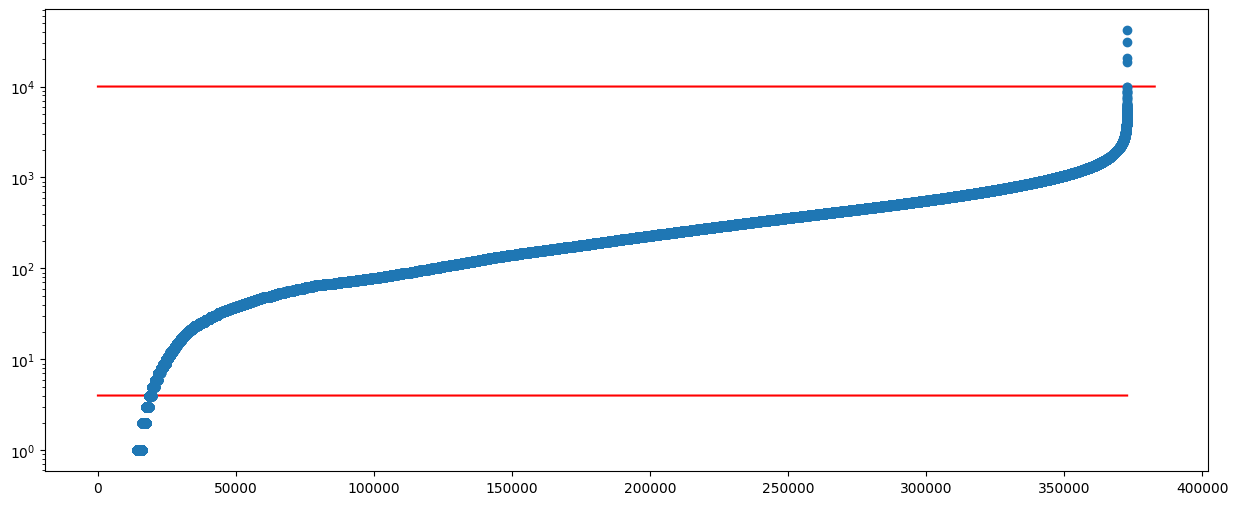

In [72]:
# distribution triée des valeurs de la colonne session_length avec la ligne rouge pour deternimé les valeurs aberrant
plt.figure(figsize=(15, 6))
plt.plot([10_000] * (len(df_demo["session_length"])+10_000), "r-")
plt.plot([4] * (len(df_demo["session_length"])+4), "r-")
plt.plot(sorted(df_demo["session_length"].values), "o")
plt.yscale('log')
plt.show()

In [35]:
df_demo = df_demo[(df_demo["session_length"]>10) & (df_demo["session_length"]<10_000)]

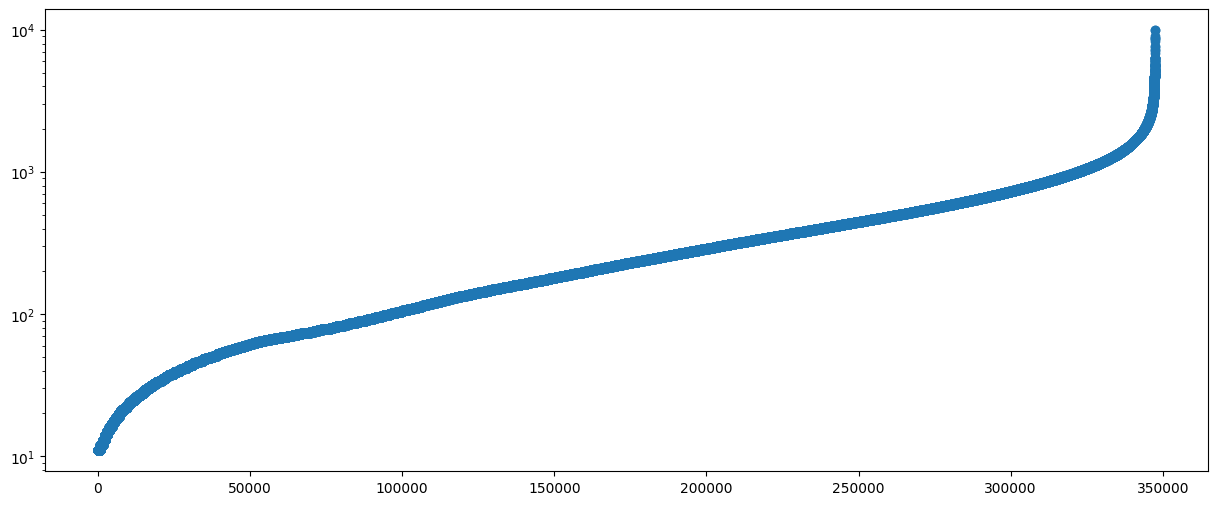

In [36]:
plt.figure(figsize=(15, 6))
plt.plot(sorted(df_demo["session_length"].values), "o")
plt.yscale('log')
plt.show()

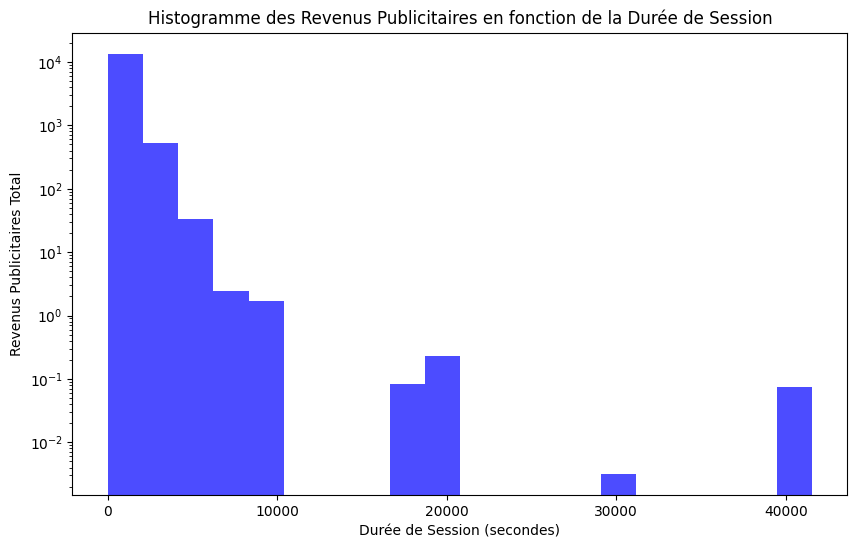

In [80]:
import matplotlib.pyplot as plt

# Créer un histogramme pour la durée de session et les revenus publicitaires
plt.figure(figsize=(10, 6))

# Histogramme des revenus publicitaires
plt.hist(df['session_length'], bins=20, weights=df['publisher_revenue'], alpha=0.7, color='blue')

# Ajouter des titres et des labels
plt.title('Histogramme des Revenus Publicitaires en fonction de la Durée de Session')
plt.xlabel('Durée de Session (secondes)')
plt.ylabel('Revenus Publicitaires Total')

plt.yscale('log')
# Afficher le graphique
plt.show()

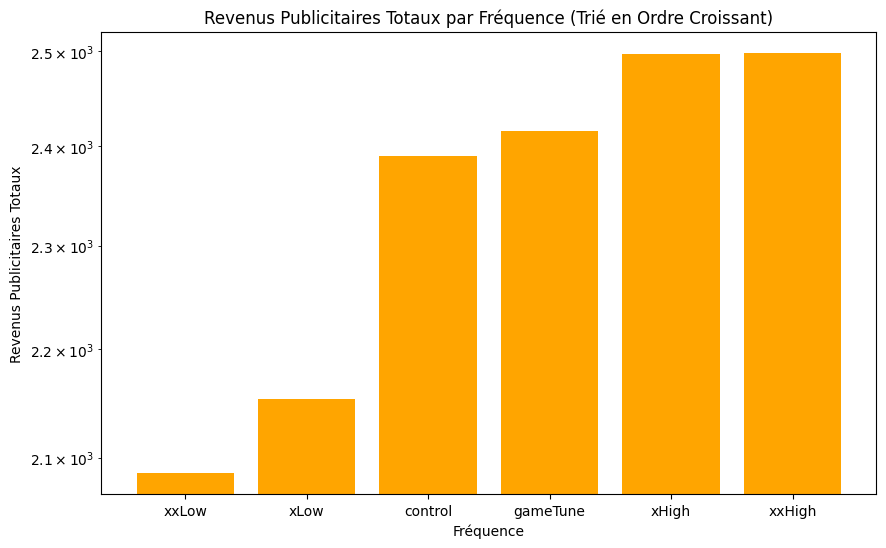

In [93]:
import matplotlib.pyplot as plt

# Grouper les données par 'ab_cohort_name' et calculer la somme des revenus publicitaires pour chaque groupe
grouped_data = df.groupby('ab_cohort_name')['publisher_revenue'].sum().reset_index()

# Trier les groupes par revenus publicitaires en ordre croissant
grouped_data_sorted = grouped_data.sort_values('publisher_revenue')

# Créer un histogramme pour les fréquences triées par revenus publicitaires
plt.figure(figsize=(10, 6))

# Histogramme des revenus publicitaires triés
plt.bar(grouped_data_sorted['ab_cohort_name'], grouped_data_sorted['publisher_revenue'], color='orange')

# Ajouter des titres et des labels
plt.title('Revenus Publicitaires Totaux par Fréquence (Trié en Ordre Croissant)')
plt.xlabel('Fréquence')
plt.ylabel('Revenus Publicitaires Totaux')

plt.yscale('log')

plt.show()

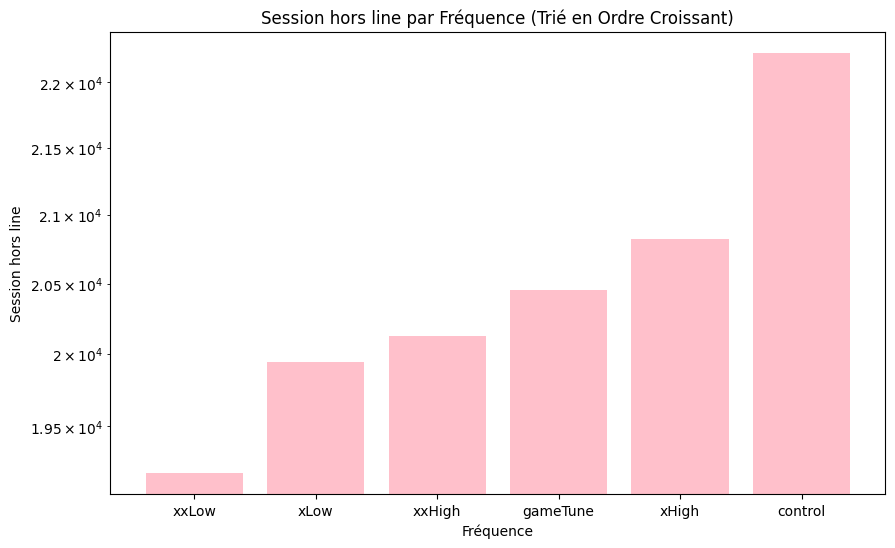

In [99]:
import matplotlib.pyplot as plt

# Grouper les données par 'ab_cohort_name' et calculer la somme des session hors line pour chaque groupe
grouped_data = df.groupby('ab_cohort_name')['offline_game_count'].sum().reset_index()

# Trier les groupes par revenus publicitaires en ordre croissant
grouped_data_sorted = grouped_data.sort_values('offline_game_count')

# Créer un histogramme pour les fréquences triées par revenus publicitaires
plt.figure(figsize=(10, 6))

# Histogramme des revenus publicitaires triés
plt.bar(grouped_data_sorted['ab_cohort_name'], grouped_data_sorted['offline_game_count'], color='pink')

# Ajouter des titres et des labels
plt.title('Session hors line par Fréquence (Trié en Ordre Croissant)')
plt.xlabel('Fréquence')
plt.ylabel('Session hors line')

plt.yscale('log')

plt.show()